# Preparation of biased coexsistence simulations

In [1]:
import numpy as np, sys, os, glob
import matplotlib.pylab as plt
import MDAnalysis

In [2]:
standard_sim=os.path.abspath('250K-5kbar')
press_box = np.genfromtxt('../1-Bulk/avg_IceV_box.dat')
single_pressure=None


In [4]:
sims = dict()
for a in press_box[:]:
    fold='COEX_{}bar/template/'.format(a[0])
    sims[fold] = dict()
    sims[fold]['p']=a[0]
    os.system('mkdir -p {}'.format(fold))
    os.system('cp -r 250K-5kbar/* {}'.format(fold))
    os.system('cp -r ../3-PrepareCoexistenceConfiguration/COEX_BOXES/water_{}bar.data {}/water.data'.format(a[0],fold))
    os.system('sed -i    "s#variable .* pressure .*#variable        pressure equal {}#g" {}/in.pressure'.format(a[0],fold))


### Setup different temperatures

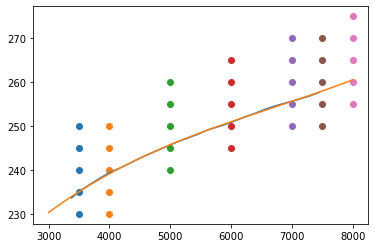

In [5]:
tip4p_vega_data=np.genfromtxt('IceV_liquid_pd.dat')
tip4p_vega_data[:,1]=tip4p_vega_data[:,1]*10
melt_fn = np.poly1d(np.polyfit(tip4p_vega_data[:,1], tip4p_vega_data[:,0], 3))

Ps=np.linspace(3000,8000,200)
plt.plot(tip4p_vega_data[:,1],tip4p_vega_data[:,0])
plt.plot(Ps,melt_fn(Ps))

for fold in sims.keys():
    p=sims[fold]['p']
    T_m=melt_fn(p)
    T_range=np.round((T_m+np.arange(-7.5,17.5,5))/5, decimals=0)*5
    sims[fold]['temps']=T_range
    plt.scatter(p+T_range*0,T_range)

In [6]:
for fold in sims.keys():
    sim=sims[fold]
    for t in sim['temps']:
        temp_fold = '{}{}K'.format(fold.replace('template',''),t)
        cmd='mkdir -p {}\n'.format(temp_fold)
        cmd+='cp {}/* {}/\n'.format(fold,temp_fold)
        cmd+='sed -i  \"s#variable.*temperature.*#variable        temperature equal {}#g\" {}/in.temp\n'.format(t,temp_fold)
        cmd+='sed -i  \"s#TEMP=250#TEMP={}#g\" {}/plumed*.dat'.format(t,temp_fold)
        
        #cmd+='sed -i \"s#variable.*temperature.*#variable        temperature equal {}#g\" {}/in.temp'.format(t,temp_fold)
        print(cmd)
        os.system(cmd)

mkdir -p COEX_3500.0bar//230.0K
cp COEX_3500.0bar/template//* COEX_3500.0bar//230.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 230.0#g" COEX_3500.0bar//230.0K/in.temp
sed -i  "s#TEMP=250#TEMP=230.0#g" COEX_3500.0bar//230.0K/plumed*.dat
mkdir -p COEX_3500.0bar//235.0K
cp COEX_3500.0bar/template//* COEX_3500.0bar//235.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 235.0#g" COEX_3500.0bar//235.0K/in.temp
sed -i  "s#TEMP=250#TEMP=235.0#g" COEX_3500.0bar//235.0K/plumed*.dat
mkdir -p COEX_3500.0bar//240.0K
cp COEX_3500.0bar/template//* COEX_3500.0bar//240.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 240.0#g" COEX_3500.0bar//240.0K/in.temp
sed -i  "s#TEMP=250#TEMP=240.0#g" COEX_3500.0bar//240.0K/plumed*.dat
mkdir -p COEX_3500.0bar//245.0K
cp COEX_3500.0bar/template//* COEX_3500.0bar//245.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 245.0#g" COEX_3500.0bar//245.0K/in.temp
sed -i  "s#TE

sed: 1: "COEX_6000.0bar//250.0K/ ...": invalid command code C
sed: 1: "COEX_6000.0bar//250.0K/ ...": invalid command code C


mkdir -p COEX_6000.0bar//255.0K
cp COEX_6000.0bar/template//* COEX_6000.0bar//255.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 255.0#g" COEX_6000.0bar//255.0K/in.temp
sed -i  "s#TEMP=250#TEMP=255.0#g" COEX_6000.0bar//255.0K/plumed*.dat
mkdir -p COEX_6000.0bar//260.0K
cp COEX_6000.0bar/template//* COEX_6000.0bar//260.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 260.0#g" COEX_6000.0bar//260.0K/in.temp
sed -i  "s#TEMP=250#TEMP=260.0#g" COEX_6000.0bar//260.0K/plumed*.dat
mkdir -p COEX_6000.0bar//265.0K
cp COEX_6000.0bar/template//* COEX_6000.0bar//265.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 265.0#g" COEX_6000.0bar//265.0K/in.temp
sed -i  "s#TEMP=250#TEMP=265.0#g" COEX_6000.0bar//265.0K/plumed*.dat
mkdir -p COEX_7000.0bar//250.0K
cp COEX_7000.0bar/template//* COEX_7000.0bar//250.0K/
sed -i  "s#variable.*temperature.*#variable        temperature equal 250.0#g" COEX_7000.0bar//250.0K/in.temp
sed -i  "s#TE

### Convert notebook to python script

In [1]:
!jupyter nbconvert --to script Prepare_coexsistence.ipynb
!sed -i 's/""//g' Prepare_coexsistence.ipyn


[NbConvertApp] Converting notebook Prepare_coexsistence.ipynb to script
[NbConvertApp] Writing 2116 bytes to Prepare_coexsistence.py
